In [151]:
from heapq import merge

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os 
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Load Data

In [152]:
DATA_PATH = "../data/processed/survey_results_public_processed.pkl"

In [153]:
raw_df = pd.read_pickle(DATA_PATH)
raw_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [154]:
data = raw_df.copy()

# Skills Analysis

In [155]:
FEATS = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "EmbeddedHaveWorkedWith",
    "MiscTechHaveWorkedWith",
    "ToolsTechHaveWorkedWith"
]

LABEL = ['DevType']

In [156]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

In [157]:
# Drop rows where DevType is null. 
# These rows can't be used for training and testing
# as DevType is our label 

print(f"Before deleting null values: {data.shape}")
data.dropna(subset='DevType', inplace=True)
print(f"After deleting null values: {data.shape}")


Before deleting null values: (65437, 114)
After deleting null values: (59445, 114)


In [158]:
data[FEATS].sample().iloc[0]

LanguageHaveWorkedWith     [Bash/Shell (all shells), PowerShell, Python, ...
DatabaseHaveWorkedWith     [BigQuery, MongoDB, MySQL, PostgreSQL, Redis, ...
PlatformHaveWorkedWith                   [Amazon Web Services (AWS), Vercel]
WebframeHaveWorkedWith              [Next.js, Node.js, React, Ruby on Rails]
EmbeddedHaveWorkedWith                                                    []
MiscTechHaveWorkedWith                                            [Electron]
ToolsTechHaveWorkedWith    [APT, Docker, Homebrew, npm, Podman, Webpack, ...
Name: 15261, dtype: object

In [159]:
data["LanguageHaveWorkedWith"].iloc[18365]

['Dart', 'Kotlin', 'Swift']

In [160]:
 # cell to delete 
 
 data['DevType']

1        Developer, full-stack
2         Developer Experience
3        Developer, full-stack
4        Developer, full-stack
5                      Student
                 ...          
65428      Developer, back-end
65431    Developer, full-stack
65432               Blockchain
65434        Developer, mobile
65435      Developer, back-end
Name: DevType, Length: 59445, dtype: object

In [161]:
# # Encoding Skills Set

encoded_feats = pd.DataFrame()
binarizer = MultiLabelBinarizer()

for col in FEATS:
    print(f".. {col}")
    binarized_df = pd.DataFrame(binarizer.fit_transform(data[col]),  
                 columns=binarizer.classes_, 
                 index=data[col].index)

    encoded_feats = pd.concat([encoded_feats, binarized_df], axis=1) 

encoded_feats

.. LanguageHaveWorkedWith
.. DatabaseHaveWorkedWith
.. PlatformHaveWorkedWith
.. WebframeHaveWorkedWith
.. EmbeddedHaveWorkedWith
.. MiscTechHaveWorkedWith
.. ToolsTechHaveWorkedWith


,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Puppet,Terraform,Unity 3D,Unreal Engine,Visual Studio Solution,Vite,Webpack,Yarn,npm,pnpm
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65431,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
65432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# WE DROP TWO FEATURES ONLY BECAUSE 
# THERE IS A BUG IN THE ONEHOT ENCODING 
# WHICH IS NOT FIXED YET 
# TODO : FIX THE BUG. 
# BUG DESCRIPTION : The MultiLabelBinarizer produces a onehot encoding 
#                     of all features correctly except for (Supabase and Ninja). For these 
#                     two features (skills) the binarizer produces two seperate columns
#                     giving a redundancy in our dataframe. 

print(f"Number of features before droping the columns [Supabase, Ninja]: {encoded_feats.columns.values.shape[0]}")
encoded_feats.drop(columns=['Supabase', 'Ninja'], inplace=True)
print(f"Number of features after droping the columns [Supabase, Ninja]: {encoded_feats.columns.values.shape[0]}")


Number of features before droping the columns [Supabase, Ninja]: 240
Number of features after droping the columns [Supabase, Ninja]: 236


In [163]:
# Cell to delete 
# It only checks why the onehotencoding raises an issue 

for feat in FEATS: 
    print(feat)
    
print("---------------------------------")
print(encoded_feats.columns.values)
print("---------------------------------")
count = 0
for col in encoded_feats.columns.values:
    if col == "Supabase":
        count += 1
        
print(f"Number of Supabase instances: {count}")

LanguageHaveWorkedWith
DatabaseHaveWorkedWith
PlatformHaveWorkedWith
WebframeHaveWorkedWith
EmbeddedHaveWorkedWith
MiscTechHaveWorkedWith
ToolsTechHaveWorkedWith
---------------------------------
['Ada' 'Apex' 'Assembly' 'Bash/Shell (all shells)' 'C' 'C#' 'C++'
 'Clojure' 'Cobol' 'Crystal' 'Dart' 'Delphi' 'Elixir' 'Erlang' 'F#'
 'Fortran' 'GDScript' 'Go' 'Groovy' 'HTML/CSS' 'Haskell' 'Java'
 'JavaScript' 'Julia' 'Kotlin' 'Lisp' 'Lua' 'MATLAB' 'MicroPython' 'Nim'
 'OCaml' 'Objective-C' 'PHP' 'Perl' 'PowerShell' 'Prolog' 'Python' 'R'
 'Ruby' 'Rust' 'SQL' 'Scala' 'Solidity' 'Swift' 'TypeScript' 'VBA'
 'Visual Basic (.Net)' 'Zephyr' 'Zig' 'BigQuery' 'Cassandra' 'Clickhouse'
 'Cloud Firestore' 'Cockroachdb' 'Cosmos DB' 'Couch DB' 'Couchbase'
 'Databricks SQL' 'Datomic' 'DuckDB' 'Dynamodb' 'Elasticsearch'
 'EventStoreDB' 'Firebase Realtime Database' 'Firebird' 'H2' 'IBM DB2'
 'InfluxDB' 'MariaDB' 'Microsoft Access' 'Microsoft SQL Server' 'MongoDB'
 'MySQL' 'Neo4J' 'Oracle' 'PostgreSQL' 'Pres

In [164]:
data['DevType']

1        Developer, full-stack
2         Developer Experience
3        Developer, full-stack
4        Developer, full-stack
5                      Student
                 ...          
65428      Developer, back-end
65431    Developer, full-stack
65432               Blockchain
65434        Developer, mobile
65435      Developer, back-end
Name: DevType, Length: 59445, dtype: object

In [165]:
onehot_enc = OneHotEncoder()
encoded_label = pd.DataFrame(onehot_enc.fit_transform(pd.DataFrame(data['DevType'])).toarray(), 
                            columns=onehot_enc.categories_, 
                            index=data['DevType'].index
                            )

encoded_label

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
feats_columns = encoded_feats.columns.values
label_columns = []
for item in encoded_label.columns.values: 
    label_columns.append(item[0])
    
# Modify the columns of the encoded_label 
encoded_label.columns = label_columns
    
merged_columns = np.concatenate([feats_columns, label_columns])
merged_columns

array(['Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#',
       'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir',
       'Erlang', 'F#', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS',
       'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua',
       'MATLAB', 'MicroPython', 'Nim', 'OCaml', 'Objective-C', 'PHP',
       'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Ruby', 'Rust',
       'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA',
       'Visual Basic (.Net)', 'Zephyr', 'Zig', 'BigQuery', 'Cassandra',
       'Clickhouse', 'Cloud Firestore', 'Cockroachdb', 'Cosmos DB',
       'Couch DB', 'Couchbase', 'Databricks SQL', 'Datomic', 'DuckDB',
       'Dynamodb', 'Elasticsearch', 'EventStoreDB',
       'Firebase Realtime Database', 'Firebird', 'H2', 'IBM DB2',
       'InfluxDB', 'MariaDB', 'Microsoft Access', 'Microsoft SQL Server',
       'MongoDB', 'MySQL', 'Neo4J', 'Oracle', 'PostgreSQL', 'Presto',
       'RavenDB', 'Redis', 'S

In [167]:
# cell to delete. 
# it checks a columns redundecy 

print("Supabase" in feats_columns)
print("Supabase" in label_columns)

count = 0
for item in feats_columns:
    if item == "Supabase":
        count += 1
        
print(f"Number of Supabase instances: {count}")

False
False
Number of Supabase instances: 0


In [168]:
encoded_df = pd.concat([encoded_feats, encoded_label], axis=1)
encoded_df.columns = merged_columns
encoded_df

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
1,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65431,0,0,0,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65432,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65434,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
# check the duplicates in the concatenated df 

already_seen = []
duplicates = []
for item in encoded_df.columns:
    if item not in already_seen:
        already_seen.append(item)
    else: 
        duplicates.append(item)
        
duplicates

[]

# Job Analysis

In [170]:
job_freq = encoded_label.apply(lambda x : x.value_counts()).T
job_freq.columns = ['Zeros', 'Ones']
job_freq

,Zeros,Ones
Academic researcher,58207,1238
Blockchain,59210,235
Cloud infrastructure engineer,58811,634
Data engineer,58327,1118
Data or business analyst,58922,523
Data scientist or machine learning specialist,58421,1024
Database administrator,59274,171
Designer,59263,182
DevOps specialist,58426,1019
Developer Advocate,59340,105


In [171]:
job_freq = job_freq.sort_values(by='Ones', ascending=False)
job_freq

,Zeros,Ones
"Developer, full-stack",41185,18260
"Developer, back-end",49517,9928
Student,54343,5102
"Developer, front-end",56096,3349
"Developer, desktop or enterprise applications",56952,2493
Other (please specify):,56987,2458
"Developer, mobile",57424,2021
"Developer, embedded applications or devices",57822,1623
Engineering manager,58170,1275
Academic researcher,58207,1238


In [172]:
job_freq[0:10].index.values

array(['Developer, full-stack', 'Developer, back-end', 'Student',
       'Developer, front-end',
       'Developer, desktop or enterprise applications',
       'Other (please specify):', 'Developer, mobile',
       'Developer, embedded applications or devices',
       'Engineering manager', 'Academic researcher'], dtype=object)

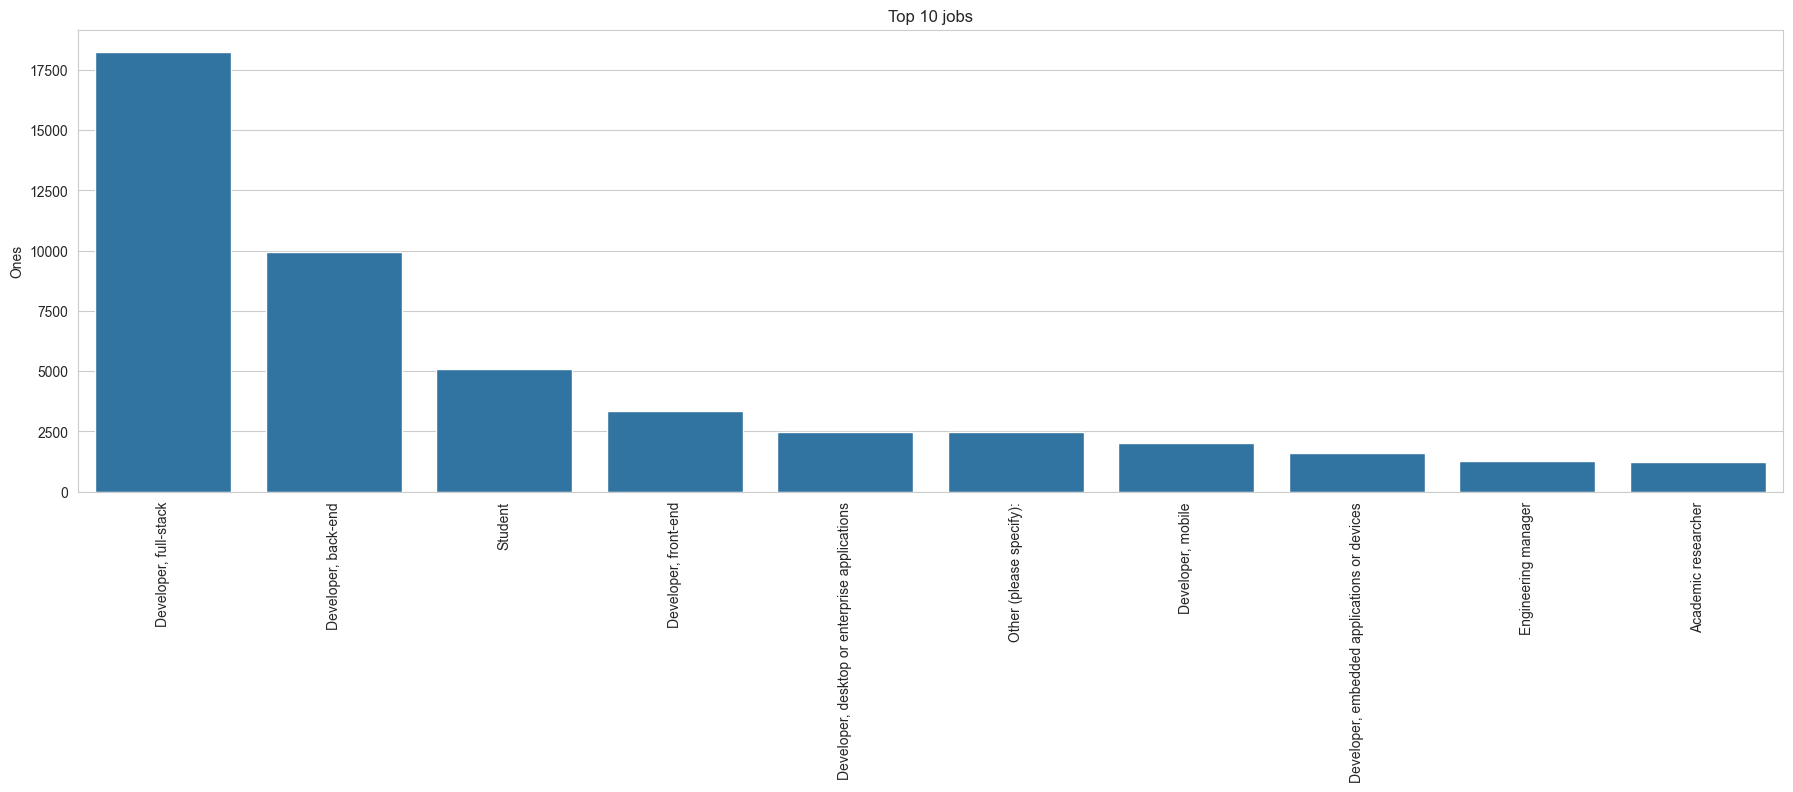

In [173]:
plt.figure(figsize=(22,6))
sns.barplot(data=job_freq[0:10], x=job_freq[0:10].index.values, y=job_freq[0:10]['Ones'])
plt.xticks(rotation=90)
plt.title("Top 10 jobs")
plt.show()

Number of jobs in the dataset: (34, 2)


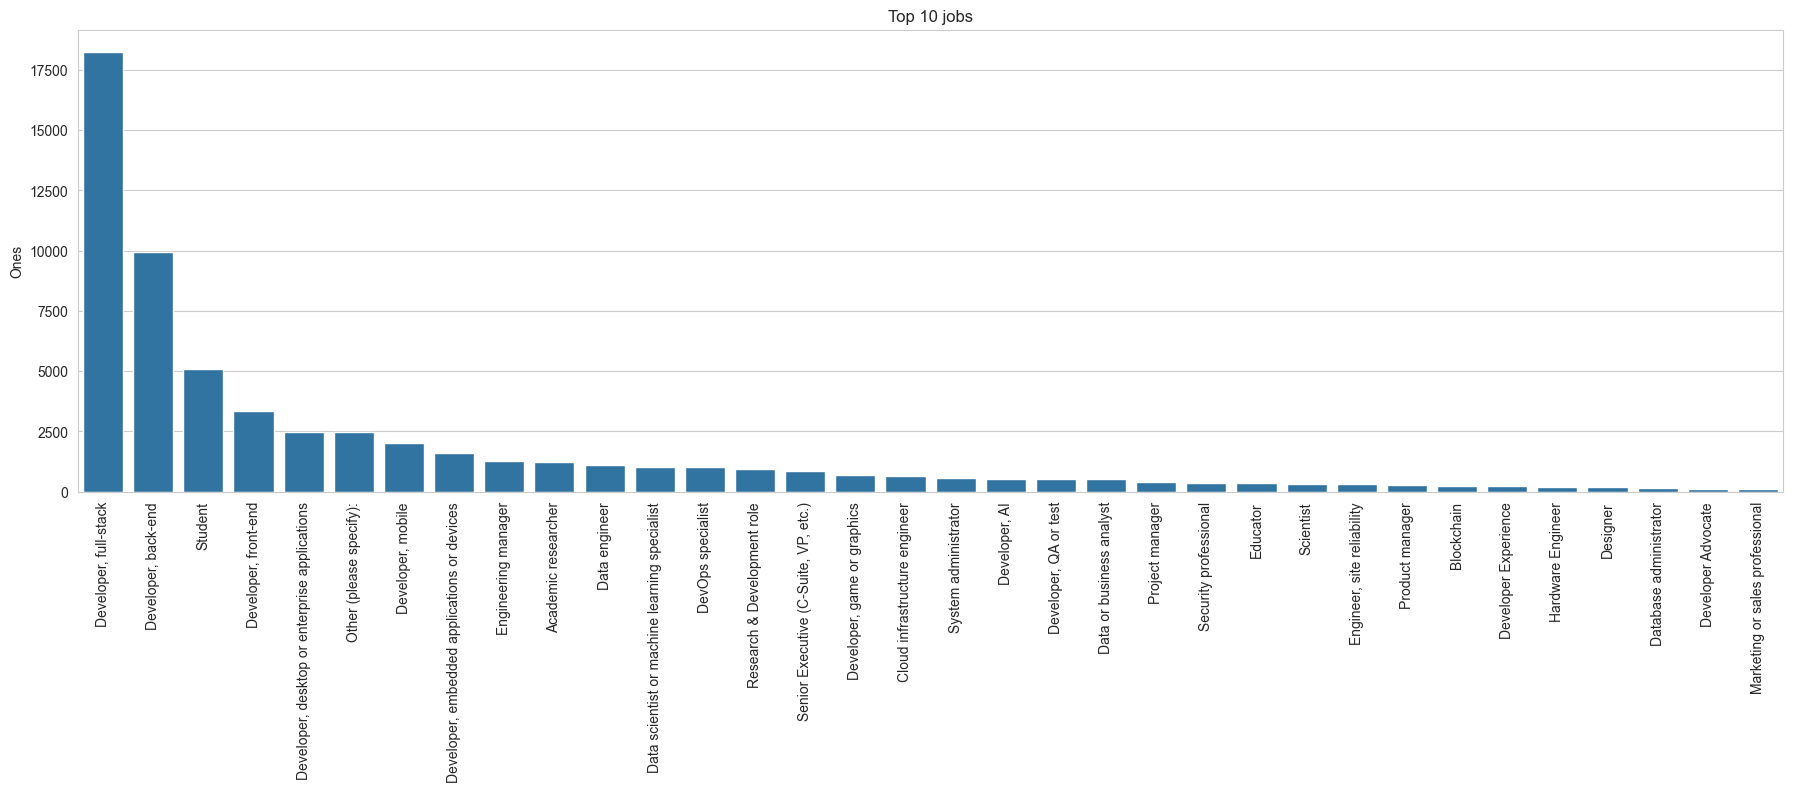

In [174]:
print(f"Number of jobs in the dataset: {job_freq.shape}")

plt.figure(figsize=(22,6))
sns.barplot(data=job_freq, x=job_freq.index.values, y=job_freq['Ones'])
plt.xticks(rotation=90)
plt.title("Top 10 jobs")
plt.show()

## The difference between Data Scientist & Developer, AI

In [175]:
dev_ai = encoded_df[encoded_df['Developer, AI'] == 1]

In [176]:
skills_freq = dev_ai[feats_columns].apply(lambda x: x.value_counts()).T
skills_freq.columns = ['Zeros', 'Ones']
skills_freq

,Zeros,Ones
Ada,533,10
Apex,533,10
Assembly,501,42
Bash/Shell (all shells),356,187
C,428,115
...,...,...
Vite,473,70
Webpack,496,47
Yarn,479,64
npm,369,174


In [177]:
skills_freq = skills_freq.sort_values(by='Ones', ascending=False)

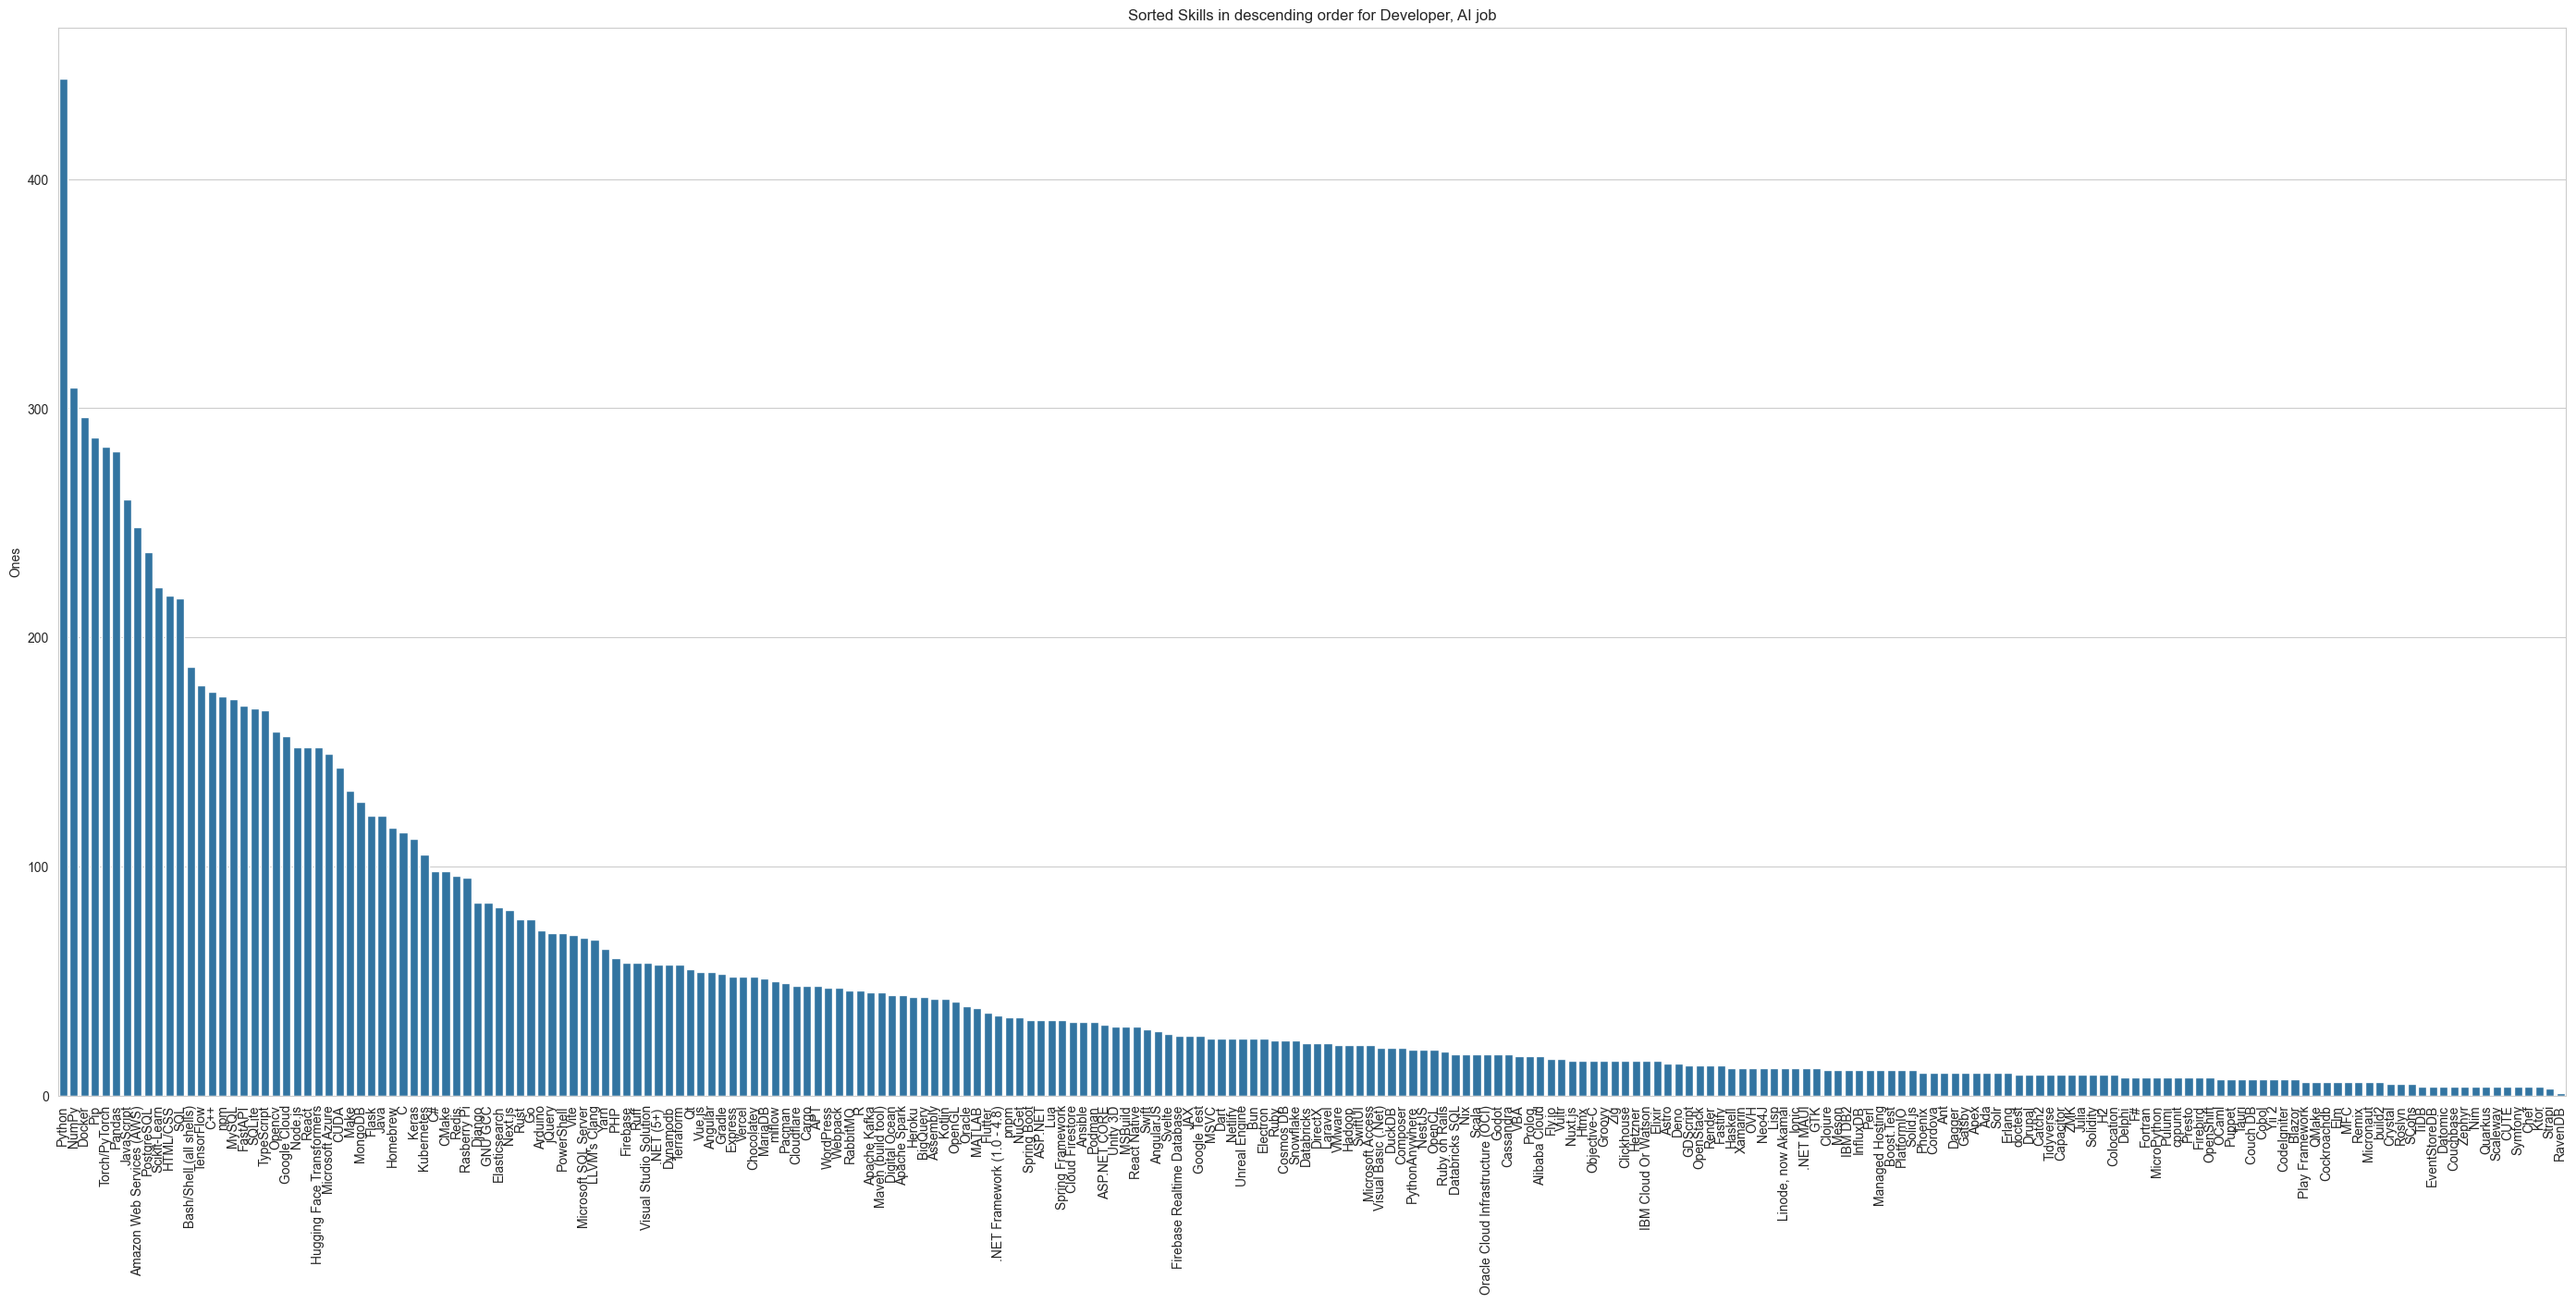

In [178]:
plt.figure(figsize=(35,15))
sns.barplot(data=skills_freq, x=skills_freq.index.values, y=skills_freq['Ones'])
plt.xticks(rotation=90)
plt.title("Sorted Skills in descending order for Developer, AI job")
plt.show()

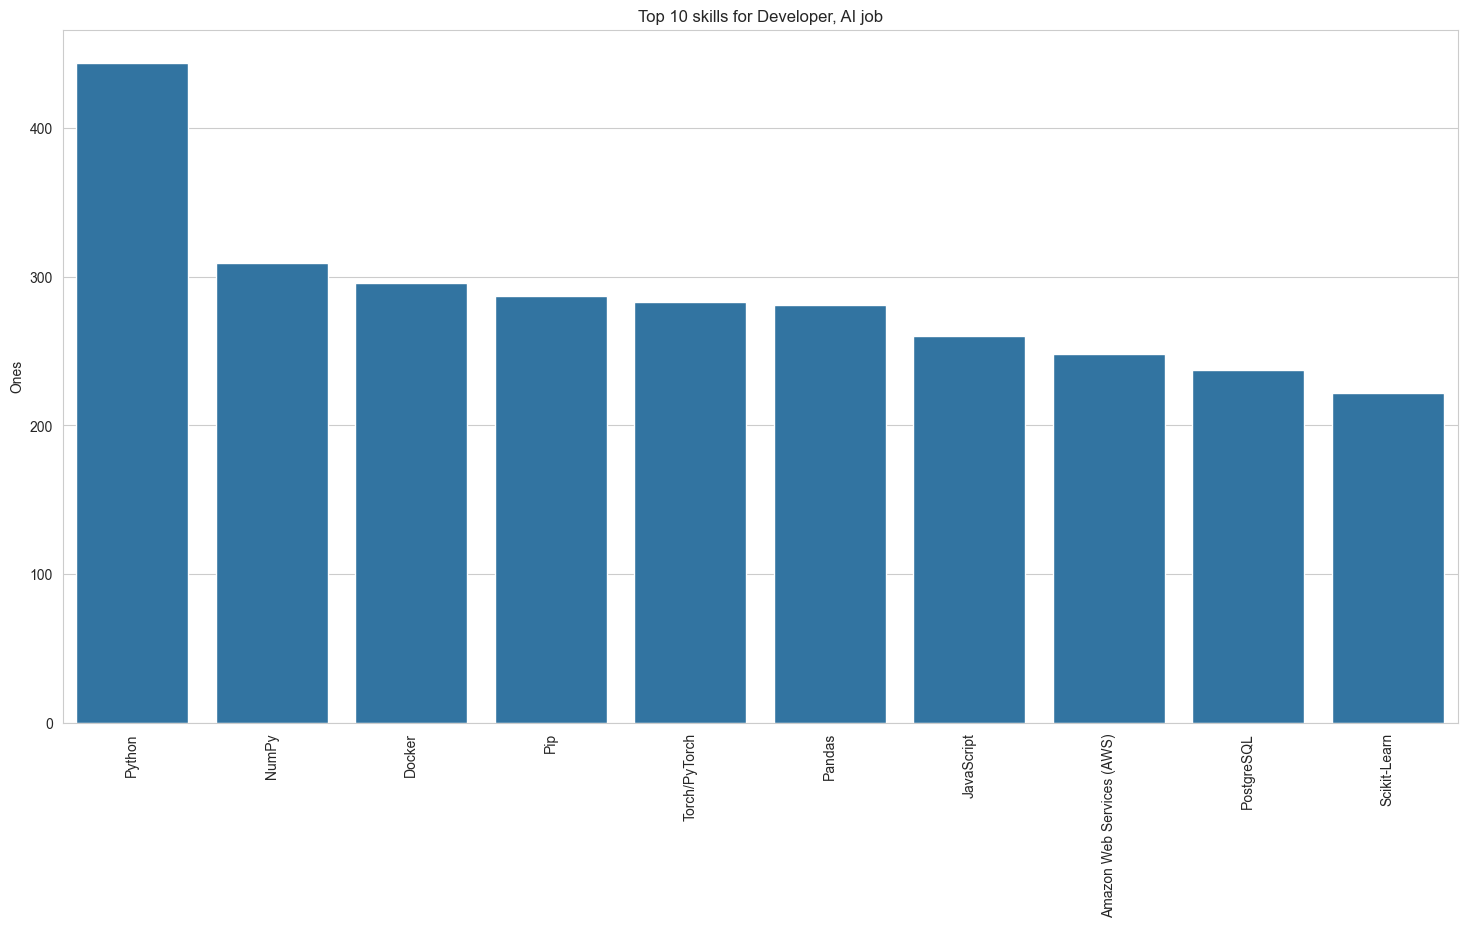

In [179]:
plt.figure(figsize=(18, 9))
sns.barplot(data=skills_freq[0:10], x=skills_freq[0:10].index.values, y=skills_freq[0:10]['Ones'])
plt.xticks(rotation=90)
plt.title("Top 10 skills for Developer, AI job")
plt.show()

In [180]:
data_scientist = encoded_df[encoded_df['Data scientist or machine learning specialist'] == 1]
data_scientist

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
37,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0,0,1,1,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64886,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65069,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65121,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65209,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
skills_freq = data_scientist[feats_columns].apply(lambda x: x.value_counts()).T
skills_freq.columns = ['Zeros', 'Ones']
skills_freq

,Zeros,Ones
Ada,1014.0,10.0
Apex,1016.0,8.0
Assembly,989.0,35.0
Bash/Shell (all shells),675.0,349.0
C,859.0,165.0
...,...,...
Vite,977.0,47.0
Webpack,993.0,31.0
Yarn,966.0,58.0
npm,829.0,195.0


In [182]:
skills_freq = skills_freq.sort_values(by='Ones', ascending=False)

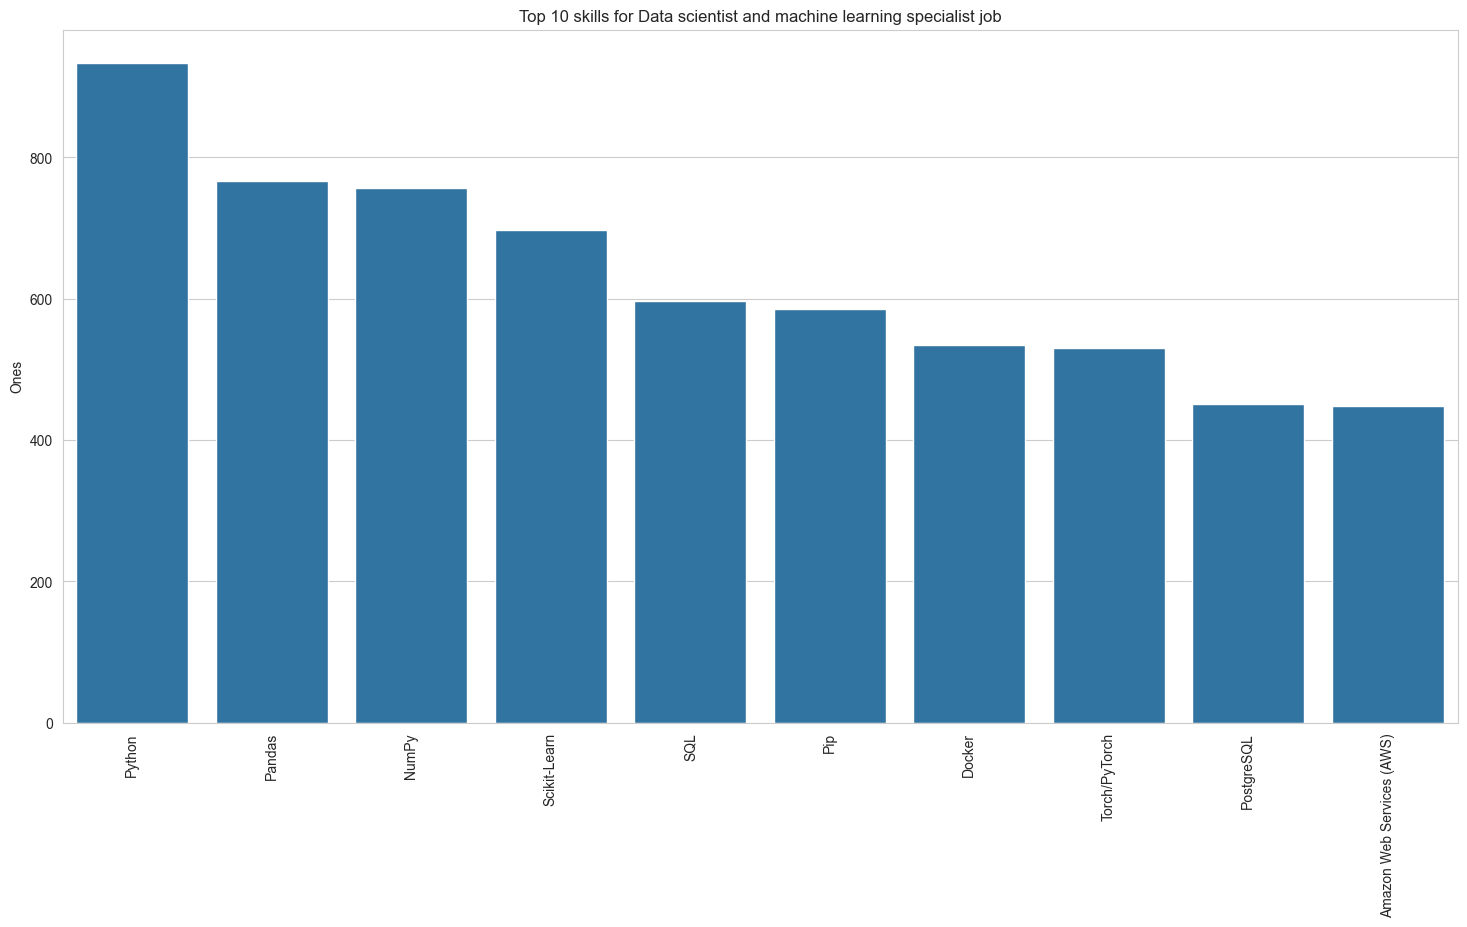

In [183]:
plt.figure(figsize=(18, 9))
sns.barplot(data=skills_freq[0:10], x=skills_freq[0:10].index.values, y=skills_freq[0:10]['Ones'])
plt.xticks(rotation=90)
plt.title("Top 10 skills for Data scientist and machine learning specialist job")
plt.show()

## Marketing or sales specialist

In [184]:
marketing_df = encoded_df[encoded_df['Marketing or sales professional'] == 1]
marketing_df

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
502,0,0,0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3987,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4856,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60538,0,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60597,0,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61884,0,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62213,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
skills_freq = marketing_df[feats_columns].apply(lambda x: x.value_counts()).T
skills_freq.columns = ['Zeros', 'Ones']
skills_freq

,Zeros,Ones
Ada,90.0,6.0
Apex,93.0,3.0
Assembly,91.0,5.0
Bash/Shell (all shells),79.0,17.0
C,85.0,11.0
...,...,...
Vite,88.0,8.0
Webpack,85.0,11.0
Yarn,89.0,7.0
npm,67.0,29.0


In [186]:
skills_freq = skills_freq.sort_values(by='Ones', ascending=False)
skills_freq

,Zeros,Ones
HTML/CSS,32.0,64.0
JavaScript,38.0,58.0
SQL,53.0,43.0
Python,59.0,37.0
MySQL,66.0,30.0
...,...,...
Neo4J,96.0,NaN
Presto,96.0,NaN
RavenDB,96.0,NaN
Solr,96.0,NaN


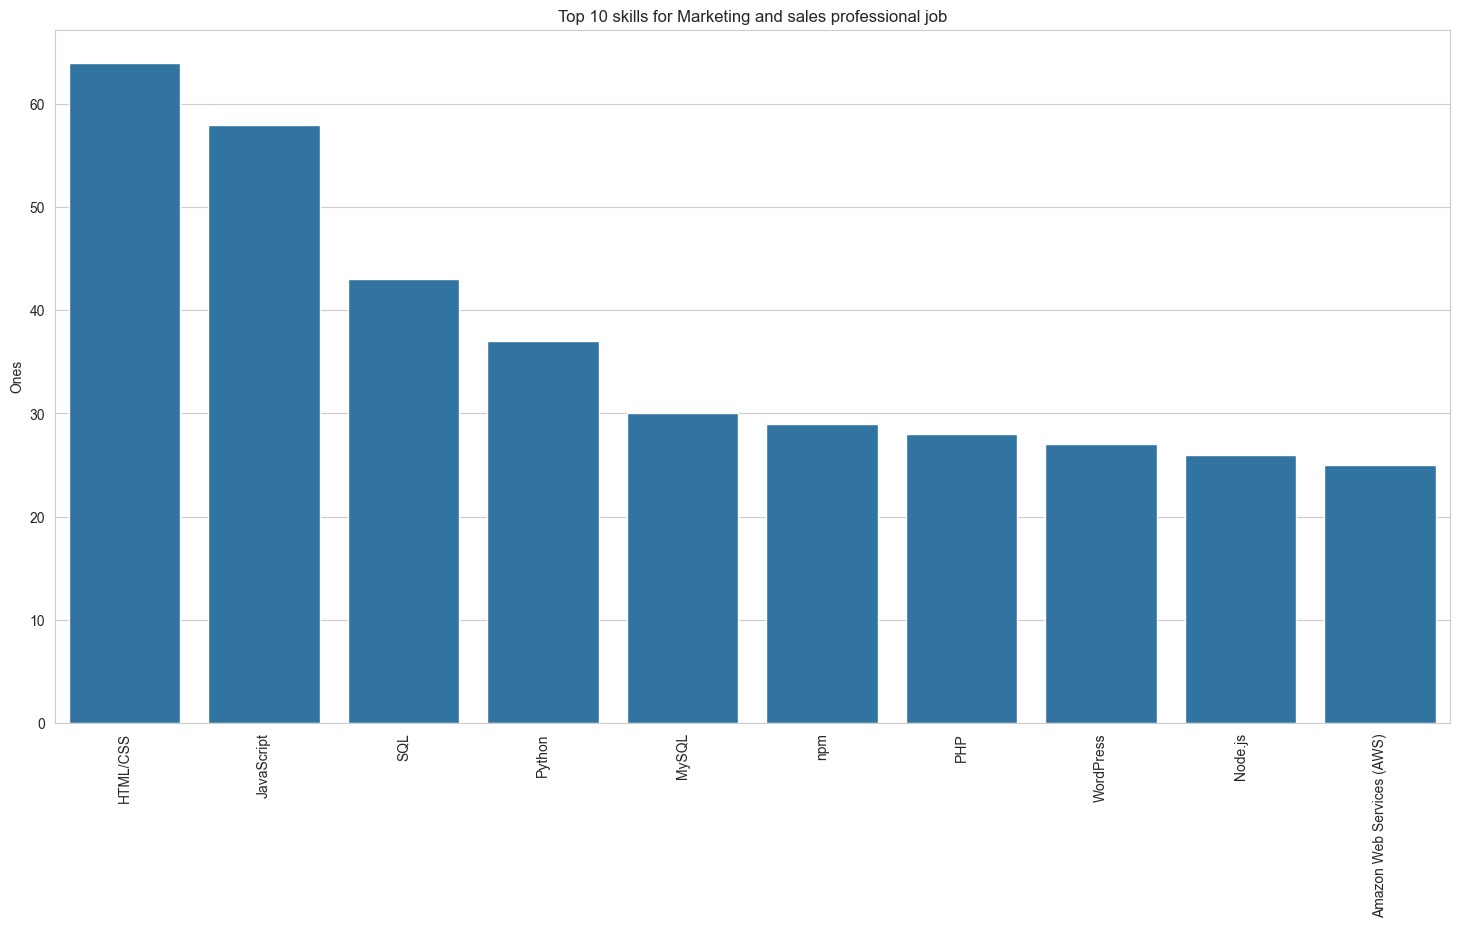

In [187]:
plt.figure(figsize=(18, 9))
sns.barplot(data=skills_freq[0:10], x=skills_freq[0:10].index.values, y=skills_freq[0:10]['Ones'])
plt.xticks(rotation=90)
plt.title("Top 10 skills for Marketing and sales professional job")
plt.show()

In [188]:
skills_freq['Ones']

HTML/CSS      64.0
JavaScript    58.0
SQL           43.0
Python        37.0
MySQL         30.0
              ... 
Neo4J          NaN
Presto         NaN
RavenDB        NaN
Solr           NaN
TiDB           NaN
Name: Ones, Length: 236, dtype: float64

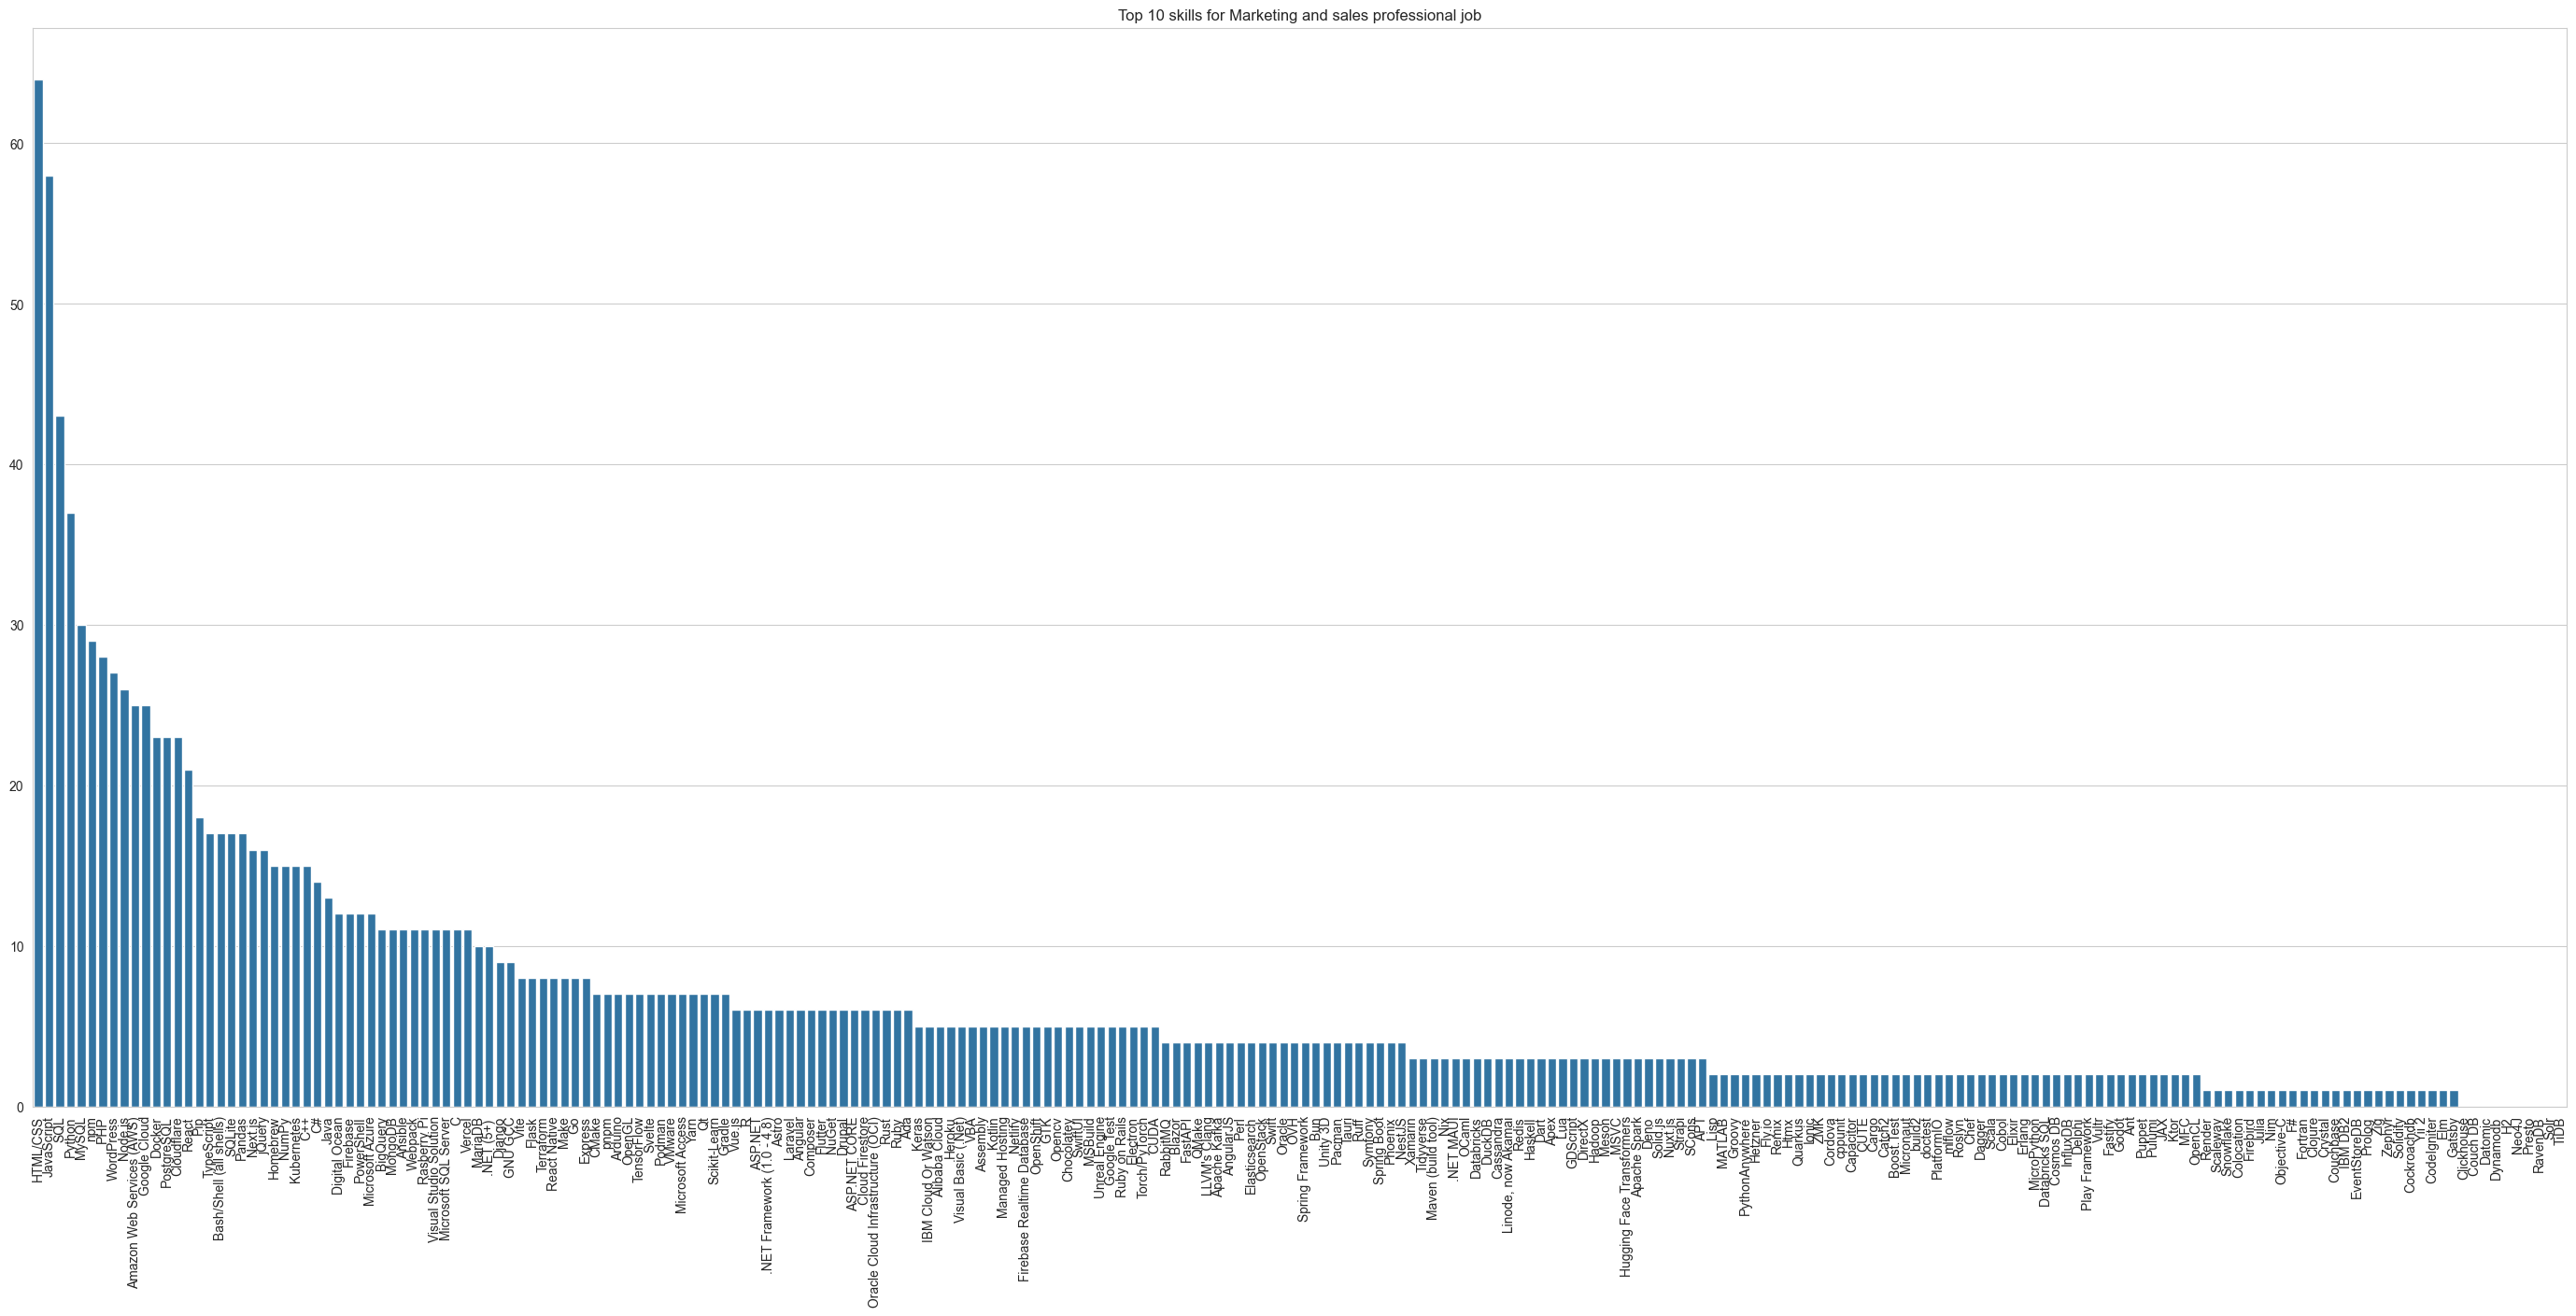

In [189]:
plt.figure(figsize=(35,15))
sns.barplot(data=skills_freq, x=skills_freq.index.values, y=skills_freq['Ones'].values)
plt.xticks(rotation=90)
plt.title("Top 10 skills for Marketing and sales professional job")
plt.show()

## Designer

In [190]:
designer_df = encoded_df[encoded_df['Designer'] == 1]
designer_df

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
75,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,0,0,0,1,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026,0,0,1,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62939,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62999,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63910,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64226,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
job_freq = designer_df[feats_columns].apply(lambda x: x.value_counts()).T
job_freq.columns = ['Zeros', 'Ones']
job_freq = job_freq.sort_values(by='Ones', ascending=False)
job_freq

,Zeros,Ones
HTML/CSS,70.0,112.0
JavaScript,71.0,111.0
Python,115.0,67.0
MySQL,122.0,60.0
npm,122.0,60.0
...,...,...
TiDB,182.0,NaN
Scaleway,182.0,NaN
mlflow,182.0,NaN
Pulumi,182.0,NaN


# Create Jobs & Skills Heatmap

In [192]:
encoded_df

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
1,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65431,0,0,0,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65432,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65434,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
feats_columns

array(['Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#',
       'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir',
       'Erlang', 'F#', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS',
       'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua',
       'MATLAB', 'MicroPython', 'Nim', 'OCaml', 'Objective-C', 'PHP',
       'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Ruby', 'Rust',
       'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA',
       'Visual Basic (.Net)', 'Zephyr', 'Zig', 'BigQuery', 'Cassandra',
       'Clickhouse', 'Cloud Firestore', 'Cockroachdb', 'Cosmos DB',
       'Couch DB', 'Couchbase', 'Databricks SQL', 'Datomic', 'DuckDB',
       'Dynamodb', 'Elasticsearch', 'EventStoreDB',
       'Firebase Realtime Database', 'Firebird', 'H2', 'IBM DB2',
       'InfluxDB', 'MariaDB', 'Microsoft Access', 'Microsoft SQL Server',
       'MongoDB', 'MySQL', 'Neo4J', 'Oracle', 'PostgreSQL', 'Presto',
       'RavenDB', 'Redis', 'S

In [194]:
res = {}

for job in label_columns : 
    temp_df = encoded_df[encoded_df[job] == 1][feats_columns]
    val_count = (temp_df.apply(lambda x : x == 1).sum() / 1238) * 100
    res[job] = val_count
    # break 
    
val_count

Ada                         0.969305
Apex                        0.726979
Assembly                    3.392569
Bash/Shell (all shells)    24.394184
C                          10.743134
                             ...    
Vite                        4.200323
Webpack                     2.746365
Yarn                        4.361874
npm                        12.439418
pnpm                        1.615509
Length: 236, dtype: float64

In [195]:
res = pd.DataFrame(res)
res 

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Ada,2.019386,1.373183,0.807754,0.484653,1.130856,0.807754,0.323102,0.403877,0.565428,0.000000,...,0.484653,3.231018,0.323102,0.807754,1.292407,0.242326,0.807754,0.323102,2.665590,0.969305
Apex,0.646204,0.565428,0.807754,0.888530,0.888530,0.646204,1.373183,0.080775,0.242326,0.161551,...,0.242326,2.504039,0.646204,0.807754,0.323102,0.161551,0.080775,1.211632,1.050081,0.726979
Assembly,9.208401,1.938611,1.534733,1.534733,1.050081,2.827141,0.726979,0.726979,3.877221,0.403877,...,0.403877,14.054927,0.646204,1.534733,7.269790,1.292407,5.088853,2.584814,59.289176,3.392569
Bash/Shell (all shells),41.276252,6.381260,32.310178,38.045234,9.369952,28.190630,5.573506,3.069467,56.462036,2.907916,...,1.373183,72.940226,6.704362,8.481422,33.198708,11.470113,15.105008,27.382876,136.025848,24.394184
C,34.571890,3.231018,8.885299,8.481422,4.200323,13.327948,2.827141,2.100162,14.539580,1.050081,...,0.888530,45.315024,4.361874,5.815832,27.463651,7.915994,12.116317,11.470113,172.051696,10.743134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vite,6.785137,1.938611,4.604200,4.604200,2.584814,3.796446,0.484653,2.827141,8.077544,1.615509,...,0.646204,19.628433,2.907916,3.554120,6.865913,1.211632,1.857835,13.004847,68.174475,4.200323
Webpack,4.361874,2.827141,5.088853,2.988691,1.373183,2.504039,0.484653,1.373183,7.835218,1.534733,...,0.888530,18.739903,3.069467,4.038772,6.623586,0.888530,2.019386,15.831987,28.029079,2.746365
Yarn,5.977383,5.977383,8.319871,6.058158,1.696284,4.684976,0.565428,2.019386,13.651050,1.534733,...,0.565428,18.901454,3.231018,4.361874,6.785137,0.969305,2.988691,15.347334,37.156704,4.361874
npm,20.678514,8.562197,20.193861,17.528271,7.592892,15.751212,1.453958,4.846527,33.279483,4.281099,...,2.342488,60.177706,9.612278,12.197092,20.274637,3.150242,9.127625,34.087237,160.096931,12.439418


In [196]:
# Sanity check 

feats_label_shape = (feats_columns.shape[0], len(label_columns))
if res.shape == feats_label_shape:
    print(f"Sanity check passed")
else : 
    print(f"Sanity check failed")

Sanity check passed


<Axes: >

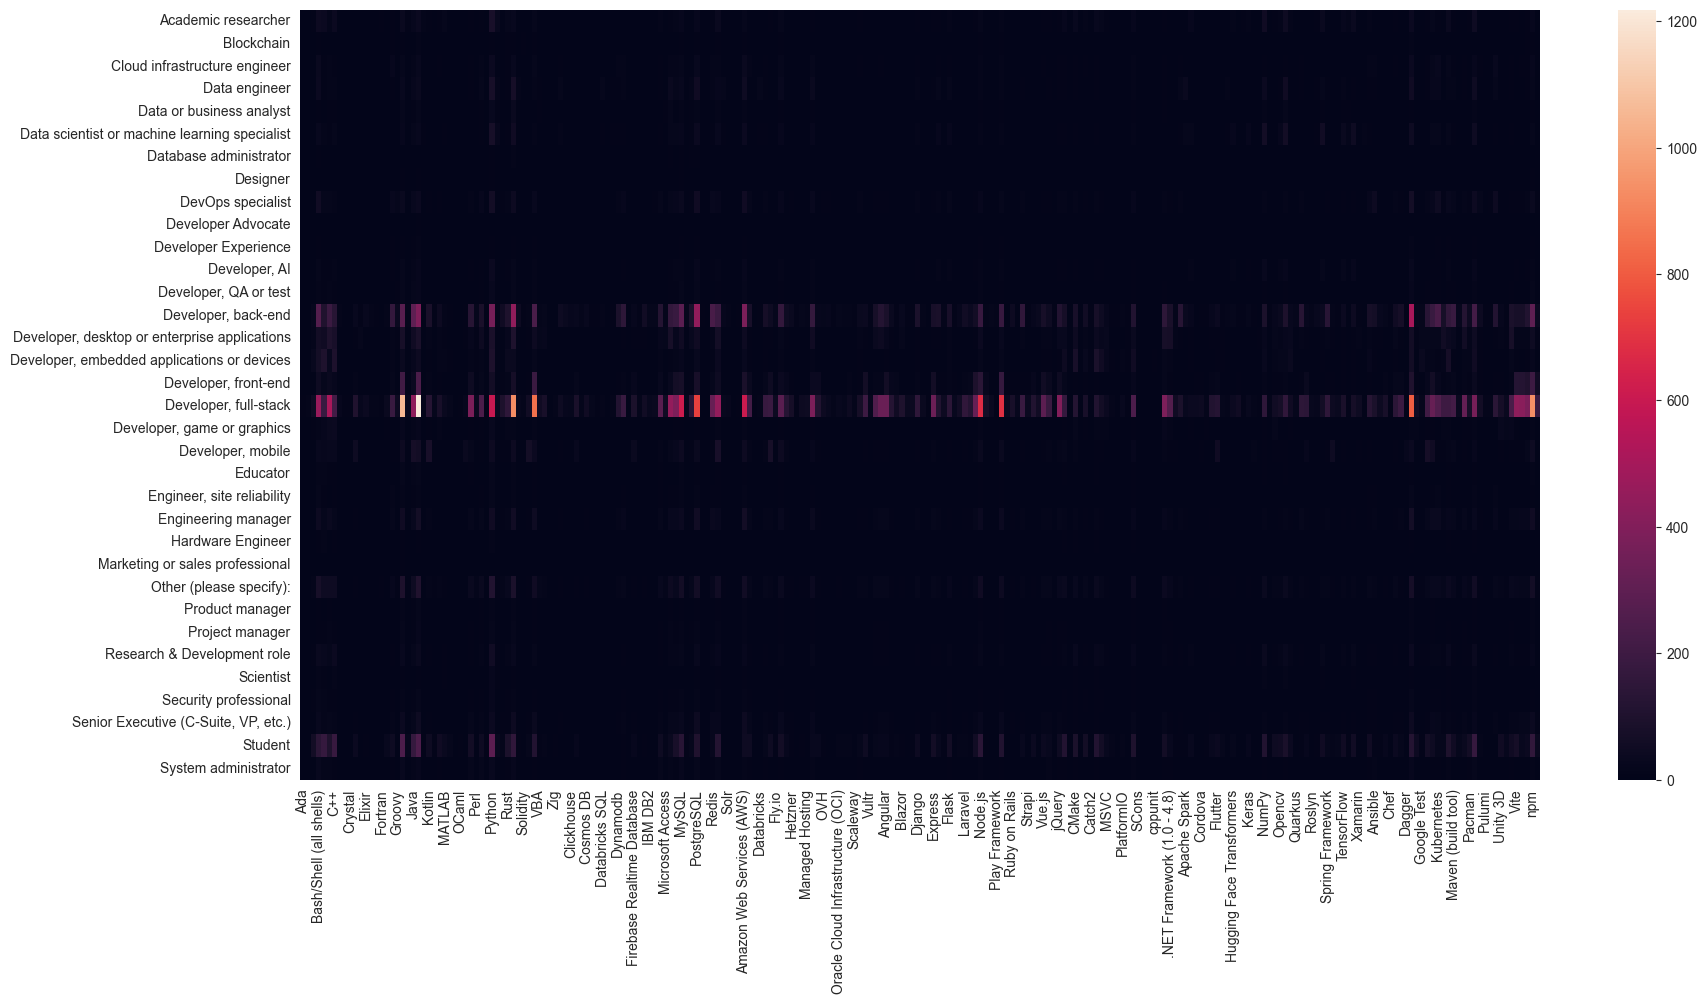

In [197]:
plt.figure(figsize=(20,10))
sns.heatmap(data=res.T)

In [198]:
for job in label_columns : 
    temp_df = encoded_df[encoded_df[job] == 1]
    sum = temp_df.apply(lambda x : x.value_counts()).sum()
    break 
    
pd.DataFrame(sum)[0].unique()

array([1238.])

## Normalize features

In [199]:
std_skills = StandardScaler().fit_transform(res)
std_skills = pd.DataFrame(std_skills, columns=res.columns, index=res.index)
std_skills

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Ada,-0.458764,-0.084065,-0.594350,-0.550192,-0.355189,-0.499582,-0.453019,-0.391892,-0.633141,-0.798795,...,-0.056970,-0.571057,-0.636366,-0.500507,-0.584630,-0.496694,-0.501214,-0.725841,-0.606672,-0.542729
Apex,-0.591906,-0.491442,-0.594350,-0.514020,-0.416749,-0.513672,0.352231,-0.655951,-0.661740,-0.629114,...,-0.417102,-0.611566,-0.507703,-0.500507,-0.702876,-0.527837,-0.718964,-0.622920,-0.642004,-0.593083
Assembly,0.238276,0.201099,-0.485701,-0.456143,-0.375709,-0.323463,-0.143307,-0.127834,-0.340004,-0.374592,...,-0.177014,0.032079,-0.507703,-0.288823,0.144550,-0.091844,0.781090,-0.463860,0.631719,-0.039188
Bash/Shell (all shells),3.347542,2.441675,4.113802,2.813865,1.737859,1.888597,3.573231,1.786592,4.314444,2.255463,...,1.263515,3.313318,1.904737,1.733936,3.307616,3.832094,3.781198,2.408581,2.309996,4.324835
C,2.697494,0.852903,0.612868,0.166026,0.424574,0.592358,1.467193,0.994416,0.603755,0.304132,...,0.543250,1.773971,0.971927,0.957761,2.607997,2.461830,2.886004,0.565354,3.097903,1.488220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vite,0.003319,0.201099,-0.026958,-0.181231,0.014173,-0.238925,-0.329134,1.588548,0.031780,0.898015,...,0.183118,0.342649,0.392942,0.299188,0.095281,-0.122986,-0.186687,0.743127,0.826046,0.128659
Webpack,-0.231639,0.649215,0.045475,-0.325922,-0.293628,-0.351642,-0.329134,0.400284,0.010331,0.813174,...,0.543250,0.293138,0.457273,0.440311,0.065720,-0.247555,-0.138298,1.070604,-0.051958,-0.173466
Yarn,-0.075000,2.237987,0.528363,-0.051010,-0.211548,-0.161433,-0.267192,0.928401,0.525108,0.813174,...,0.063074,0.302140,0.521605,0.534393,0.085427,-0.216413,0.152035,1.014465,0.147669,0.162228
npm,1.350406,3.541594,2.302974,0.976294,1.286417,0.803702,0.414174,3.238915,2.262483,3.697751,...,2.704044,2.602158,3.062709,2.815877,1.731010,0.624431,1.990811,3.185169,2.836445,1.840699


<Axes: >

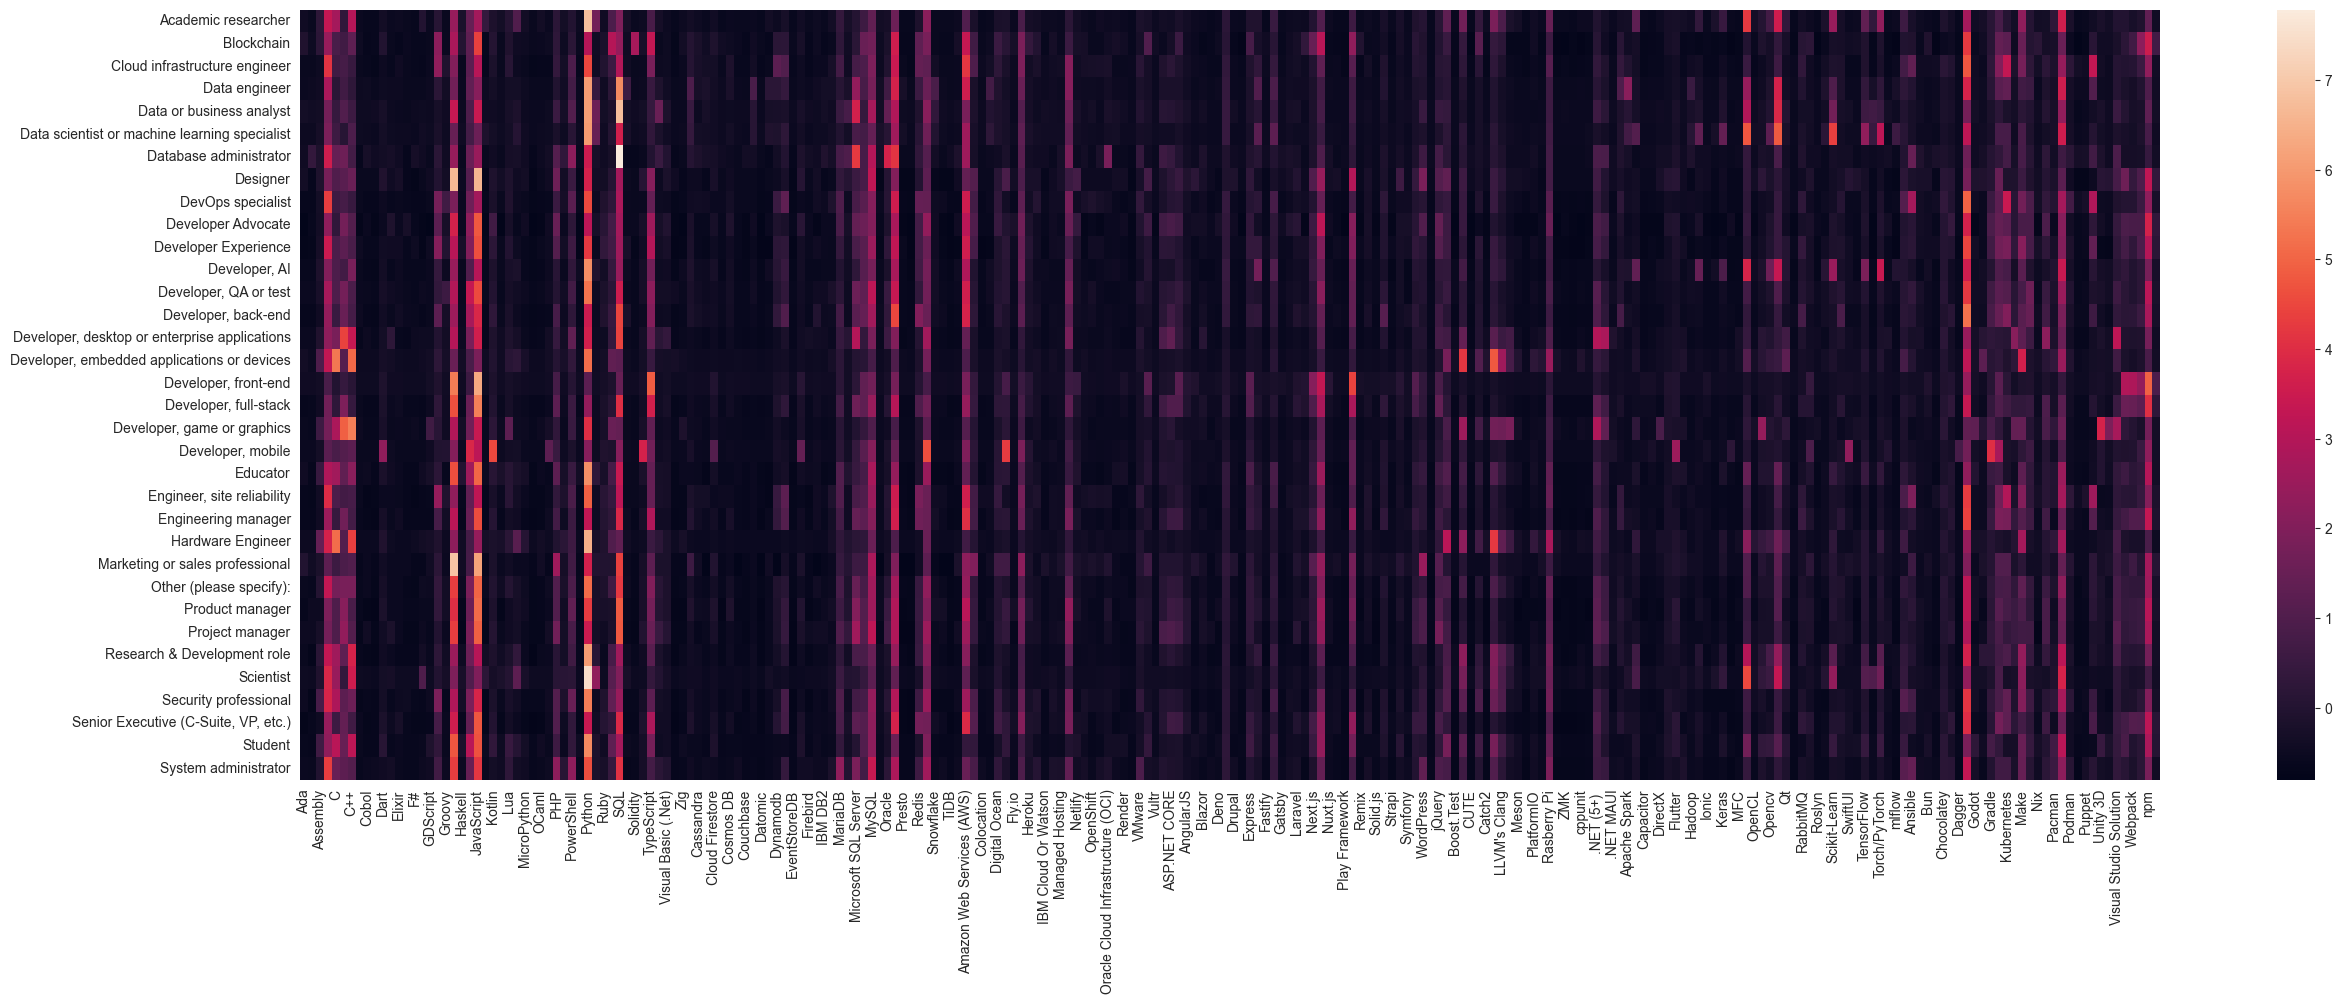

In [200]:
plt.figure(figsize=(30,10))
sns.heatmap(data=std_skills.T)

In [203]:
fig = go.Figure(data=go.Heatmap(z=std_skills.T, x=std_skills.T.columns,y=std_skills.T.index, colorscale='magma', ygap=1))
fig.update_layout(width=2000, height=100)
fig.show()
fig.write_html(os.path.join("./", 'heatmap.html'))

In [204]:
fig = ff.create_dendrogram(std_skills.T, labels=label_columns, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()
fig.write_html(os.path.join("./", 'dendrogram.html'))